In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(r'..\movingrange'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import movingrange
import numpy as np
import pandas as pd

In [3]:
import importlib

In [22]:
importlib.reload(movingrange)

number_of_records = 100
values = np.random.randint(1,51,number_of_records)
periods = range(number_of_records)

x = movingrange.movingrange(8)
x.load_from_arrays(periods, values)

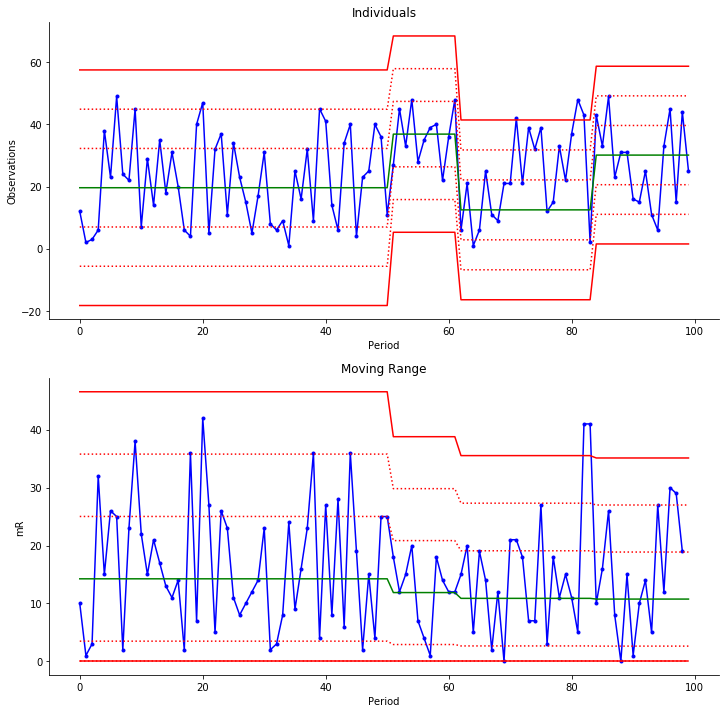

In [23]:
x.plot()

In [13]:
x.rules.basic_rules()

{'Rule 1': [], 'Rule 2': []}

In [14]:
x.rules.western_electic_rules()

{'Rule 1': [], 'Rule 2': [], 'Rule 3': [], 'Rule 4': []}

In [15]:
x.rules.nelson_rules()

{'Rule 1': [],
 'Rule 2': [],
 'Rule 3': [11, 12, 13, 14, 15, 16],
 'Rule 4': [],
 'Rule 5': [],
 'Rule 6': [],
 'Rule 7': [],
 'Rule 8': []}

In [13]:
x.value_series

array([16, 35, 23,  7, 37, 42, 12, 26, 21, 49, 48, 32, 46, 41, 27,  1, 37,
       47, 30, 26, 21, 32, 25, 11, 37, 10, 45, 24, 30, 33, 45,  6, 44,  4,
        4, 23, 43, 38, 30, 48, 31, 43, 12, 50, 18, 16, 26, 24, 36,  9,  4,
       20, 22, 18, 43, 18, 48, 23, 31, 12, 45, 45, 14, 33, 30, 14, 17, 37,
       33,  4, 26,  7, 21, 39,  7, 10, 19,  8,  9, 31, 14, 46,  4, 33, 25,
        5, 24,  8, 16, 11, 38,  3,  2, 39, 40, 42, 30, 36,  2, 39])

In [14]:
x.describe()

Population
Number of Samples = 100
Population Mean = 25.66
Population Maximum = 50
Population Minimum = 1
Number of Segments = 5



In [16]:
x.segments[0].describe()

AttributeError: 'segment' object has no attribute 'describe'